# Collecting Data

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
import math
import sklearn

In [5]:
titanic_data=pd.read_csv("titanic.csv")
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
print("Number of passenger in the titanic is "+str(len(titanic_data.index)))

Number of passenger in the titanic is 891


# Analyze Data

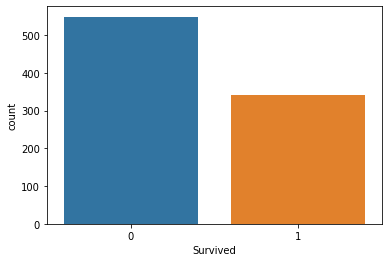

In [7]:
# how much survived or not 0 is not survived and 1 is survived
sns.countplot(x="Survived", data=titanic_data)

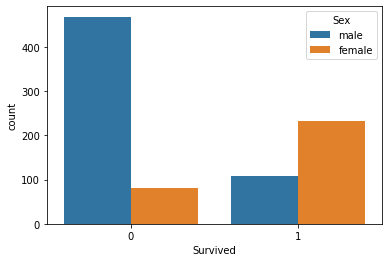

In [8]:

sns.countplot(x="Survived",hue="Sex",data=titanic_data)

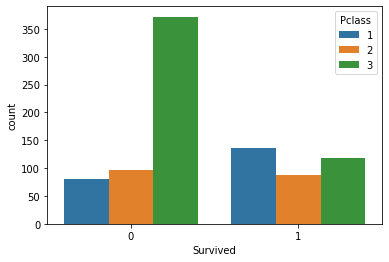

In [16]:
# which class passenger did not survived more
sns.countplot(x="Survived",hue="Pclass",data=titanic_data)

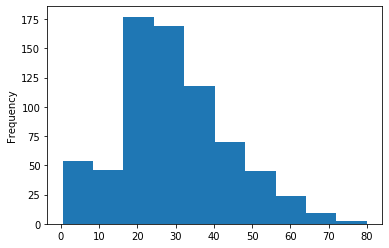

In [17]:
titanic_data["Age"].plot.hist()

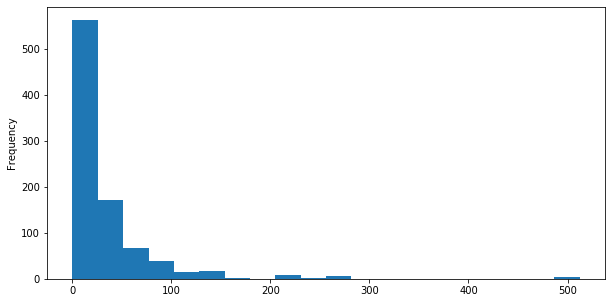

In [28]:
titanic_data["Fare"].plot.hist(bins=20,figsize=(10,5))

In [29]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


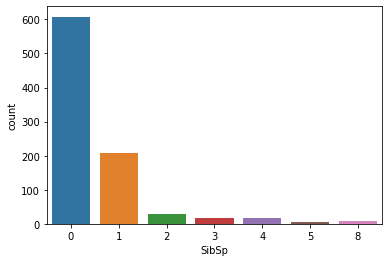

In [10]:
sns.countplot(x="SibSp",data=titanic_data)

# Data Wrangling

In [11]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

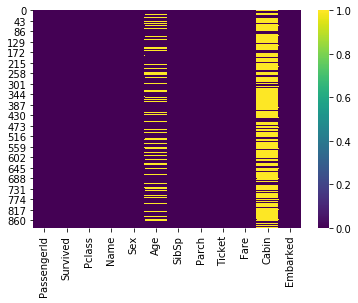

In [13]:
sns.heatmap(titanic_data.isnull(),cmap="viridis")

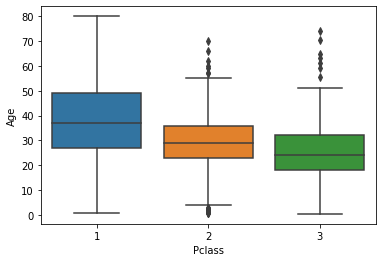

In [14]:
sns.boxplot(x="Pclass",y="Age",data=titanic_data)

In [15]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
titanic_data.dropna(inplace=True)

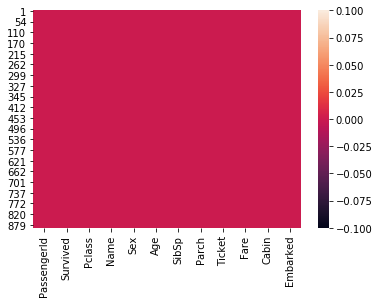

In [17]:
sns.heatmap(titanic_data.isnull())

In [18]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [19]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [20]:
sex=pd.get_dummies(titanic_data["Sex"],drop_first=True)
sex.head(5)

,male
1,0
3,0
6,1
10,0
11,0


In [21]:
embark=pd.get_dummies(titanic_data["Embarked"],drop_first=True)
embark.head(5)

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1


In [22]:
Pclass=pd.get_dummies(titanic_data["Pclass"],drop_first=True)
Pclass.head(5)

,2,3
1,0,0
3,0,0
6,0,0
10,0,1
11,0,0


In [51]:
titanic_data=pd.concat([titanic_data,sex,embark,Pclass],axis=1)

In [53]:
titanic_data.drop("Cabin",axis=1,inplace=True)

In [54]:
titanic_data.head(5)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3,male,Q,S,2,3
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,1,0,0
6,0,54.0,0,0,51.8625,1,0,1,0,0,1,0,1,0,0
10,1,4.0,1,1,16.7000,0,0,1,0,1,0,0,1,0,1
11,1,58.0,0,0,26.5500,0,0,1,0,0,0,0,1,0,0


In [56]:
titanic_data.drop(["PassengerId","Pclass","Name","Sex","Ticket","Embarked"],axis=1,inplace=True)

KeyError: "['PassengerId' 'Pclass' 'Name' 'Sex' 'Ticket' 'Embarked'] not found in axis"

In [57]:
titanic_data.head(5)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3,male,Q,S,2,3
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,1,0,0
6,0,54.0,0,0,51.8625,1,0,1,0,0,1,0,1,0,0
10,1,4.0,1,1,16.7000,0,0,1,0,1,0,0,1,0,1
11,1,58.0,0,0,26.5500,0,0,1,0,0,0,0,1,0,0


In [71]:
titanic_data.head(30)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3,male,Q,S,2,3
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,1,0,0
6,0,54.0,0,0,51.8625,1,0,1,0,0,1,0,1,0,0
10,1,4.0,1,1,16.7000,0,0,1,0,1,0,0,1,0,1
11,1,58.0,0,0,26.5500,0,0,1,0,0,0,0,1,0,0
21,1,34.0,0,0,13.0000,1,0,1,1,0,1,0,1,1,0
23,1,28.0,0,0,35.5000,1,0,1,0,0,1,0,1,0,0
27,0,19.0,3,2,263.0000,1,0,1,0,0,1,0,1,0,0
52,1,49.0,1,0,76.7292,0,0,0,0,0,0,0,0,0,0
54,0,65.0,0,1,61.9792,1,0,0,0,0,1,0,0,0,0


# Train Dataset

In [58]:
X=titanic_data.drop("Survived",axis=1)
y=titanic_data["Survived"]

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
logmodel=LogisticRegression()

In [74]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
predictions=logmodel.predict(X_test)

In [76]:
from sklearn.metrics import classification_report

In [77]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.56      0.53      0.55        17\n           1       0.79      0.82      0.81        38\n\n    accuracy                           0.73        55\n   macro avg       0.68      0.67      0.68        55\nweighted avg       0.72      0.73      0.72        55\n'

In [78]:
from sklearn.metrics import confusion_matrix

In [79]:
confusion_matrix(y_test,predictions)

array([[ 9,  8],
       [ 7, 31]], dtype=int64)

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
accuracy_score(y_test,predictions)

0.7272727272727273